In [21]:
import cv2
import numpy as np
import math
import tqdm
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB, COLOR_BGR2GRAY
from scipy.fft import fft, fftfreq

dataset_path = '../dataset/'
test_pictures_path = dataset_path + 'tif_merged_processed/'

In [2]:
picture = '1w_D Merged_Processed.tif'
picture_path = test_pictures_path + picture

#import image
img = cv2.imread(picture_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, 'file could not be read, check with os.path.exists()'   # asert check if true, otherwise raise an AssertionError with an optional error message

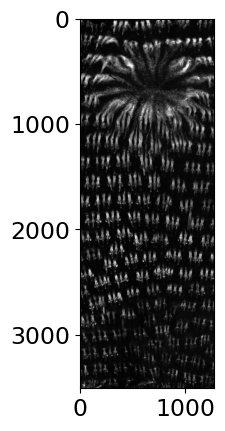

In [24]:
plt.imshow(img, cmap='gray')

In [3]:
#image shape
(xs,ys) = img.shape
print('image shape: ', img.shape)

image shape:  (3510, 1272)


In [7]:
# Sum of the pixel intensity for each row (transversely to the follicles)
intensity_sum = 0
sum_list = []
for x in range(0,xs):
    for y in range(0,ys):
        intensity = img[x,y]
        intensity_sum = intensity_sum + intensity
    sum_list.append(intensity_sum)
    intensity_sum = 0

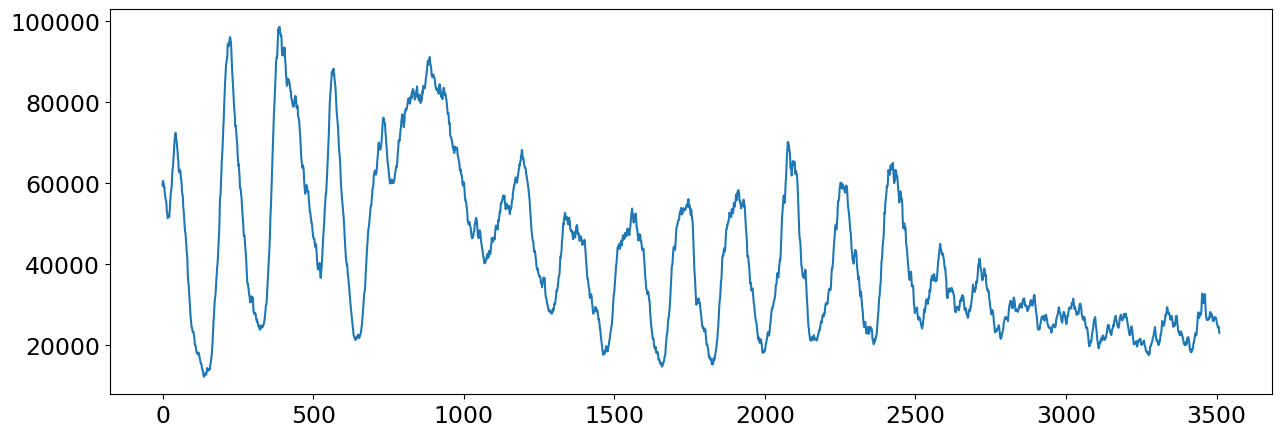

In [8]:
# Plot the sum of intensities
fig = plt.figure(figsize=(15,5))
plt.rc('xtick', labelsize=17)   
plt.rc('ytick', labelsize=17) 
plt.plot(sum_list)

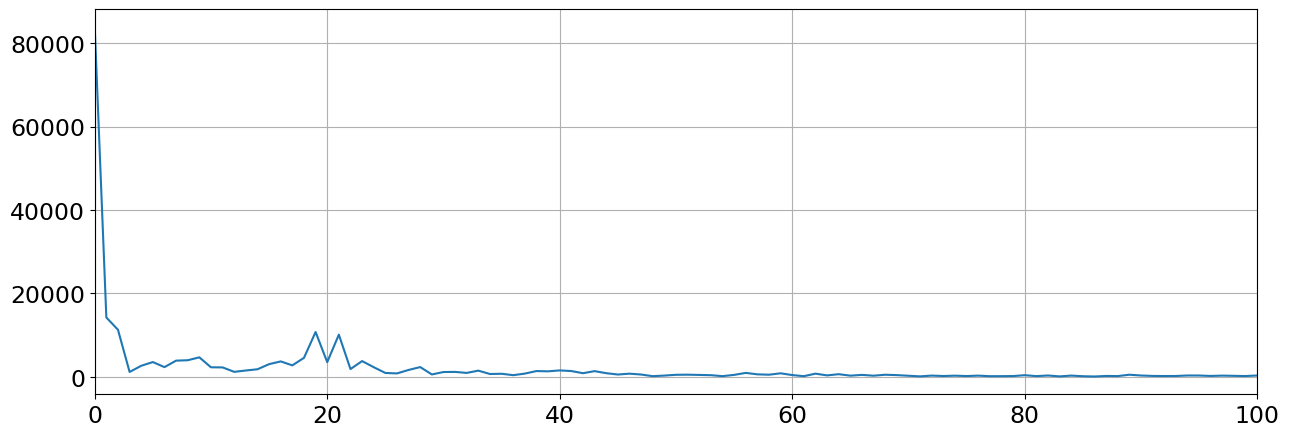

In [23]:
N = xs
T = 1.0 / N
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(sum_list)
xf = fftfreq(N, T)[:N//2]

fig, ax = plt.subplots(figsize=(15,5))
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,100)
plt.show()
